## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

In [ ]:
### Import Data
# Define a path for easier importing 
path = r'C:\Users\shaiv\Downloads\ClimateWins'

In [ ]:
# Import climate_cleaned data

climate = pd.read_csv(os.path.join(path, '02 Data', 'weather_clean.csv'), index_col = False)

In [ ]:
### Import the  weather data
weather = pd.read_csv(os.path.join(path, '02 Data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [5]:
climate.shape

(22950, 170)

In [6]:
climate.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_wind_speed,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_snow_depth,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,GDANSK_cloud_cover,GDANSK_humidity,GDANSK_precipitation,GDANSK_snow_depth,GDANSK_temp_mean,GDANSK_temp_min,GDANSK_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_snow_depth,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_wind_speed,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_wind_speed,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_wind_speed,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_snow_depth,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_wind_speed,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_snow_depth,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,ROMA_cloud_cover,ROMA_wind_speed,ROMA_humidity,ROMA_pressure,ROMA_sunshine,ROMA_temp_mean,SONNBLICK_cloud_cover,SONNBLICK_wind_speed,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,6.5,0.8,10.9,1,0.81,1.0195,0.88,0.00,7.0,3.7,-0.9,7.9,4,0.67,1.017,0.44,0.01,2.3,2.4,-0.4,5.1,7,7.7,0.85,1.0032,0.07,0.25,0.0,9.3,7.4,11.0,8,5.4,0.83,1.0161,0.12,0.08,0,0.0,10.0,7.0,11.5,8,0.91,0.00,0,0.8,-0.3,1.6,7,0.91,1.0010,0.13,0.22,0,0.0,10.6,9.4,8.3,2.9,0.82,1.0094,0.28,0.48,1.6,7.9,3.9,9.4,8,1.4,1.00,1.0173,0.20,0.00,0.0,-0.6,-1.9,0.5,7,8.7,0.83,1.0063,0.22,0.32,1.0,9.5,8.5,11.1,6,0.0,0.92,1.0260,0.53,0.0,1.4,7.6,4.4,10.8,5,0.67,0.20,0.10,0,0.0,6.9,1.1,10.4,8,4.0,0.98,0.9978,0.04,1.14,0,0.0,4.9,3.8,5.9,3,2.6,0.73,1.0152,7.1,7.8,4,4.5,0.73,1.0304,0.48,0.01,2.3,-5.9,-8.5,-3.2,5,1.0114,0.05,0.32,0.0,4.2,2.2,4.9,3.8,0.76,1.0169,1.54,0.44,10.0,7.8,12.2,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84

In [7]:
weather.shape

(22950, 16)

In [8]:
weather.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Data Wrangling
- Reduce data to the 2010s (2010-2019).

In [9]:
# Reduce  dataset to climate 2010's

climate_decade = climate[(climate['DATE'].astype(str).str[:4] >= '2010') & (climate['DATE'].astype(str).str[:4] <= '2019')]
climate_decade

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_wind_speed,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_snow_depth,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,GDANSK_cloud_cover,GDANSK_humidity,GDANSK_precipitation,GDANSK_snow_depth,GDANSK_temp_mean,GDANSK_temp_min,GDANSK_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_snow_depth,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_wind_speed,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_wind_speed,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_wind_speed,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_snow_depth,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_wind_speed,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_snow_depth,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,ROMA_cloud_cover,ROMA_wind_speed,ROMA_humidity,ROMA_pressure,ROMA_sunshine,ROMA_temp_mean,SONNBLICK_cloud_cover,SONNBLICK_wind_speed,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
18263,20100101,1,8,2.3,0.93,0.9965,0.18,0.56,0,0.0,2.9,-0.2,4.8,6,0.85,0.9912,0.64,2.63,3.2,9.9,8.4,13.4,6,0.67,1.017,0.31,0.00,0.7,5.0,3.6,7.8,4,3.8,0.78,1.0026,0.37,0.00,4.2,-1.6,-6.3,0.7,8,3.9,0.89,0.9997,0.12,0.02,0,0.0,-1.1,-2.8,-0.6,6,0.85,0.00,2,-2.6,-5.4,-0.3,2,0.77,1.0056,0.49,0.00,0,6.4,1.6,-0.5,5.0,3.1,0.93,0.9981,0.12,0.20,0.0,-2.6,-3.0,-1.8,8,1.0,0.97,0.9926,0.12,0.46,0.0,6.9,5.5,7.7,7,4.6,0.91,1.0008,0.12,0.01,0.0,-2.0,-6.1,-1.1,5,4.4,0.82,1.0107,0.46,0.01,2.8,5.6,3.6,7.6,7,0.91,0.20,0.43,0,0.0,3.1,0.1,4.9,7,6.0,0.76,1.0110,0.04,0.24,33,0.0,-7.7,-8.9,-4.9,3,5.0,0.73,1.0152,7.1,15.4,4,7.5,0.89,1.0054,0.66,0.56,5.6,-9.7,-11.5,-7.9,6,1.0068,0.12,0.07,1.5,-7.6,-8.8,-7.0,3.4,0.86,1.0040,0.11,0.00,0.6,-0.7,1.8,1,0.80,1.0121,0.43,0.00,0,6.0,1.7,-1.6,5.0
18264

In [10]:
# Reduce weather dataset to 2010's

weather_decade = weather[(weather['DATE'].astype(str).str[:4] >= '2010') & (weather['DATE'].astype(str).str[:4] <= '2019')]
weather_decade

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
18263,20100101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18264,20100102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18265,20100103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18266,20100104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18267,20100105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21910,20191227,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21911,20191228,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21912,20191229,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21913,20191230,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
# Drop columns that end with wind_speed and snow_depth from the dataset

columns_to_drop = climate_decade.filter(regex='(_wind_speed|_snow_depth)$').columns
columns_to_drop

Index(['BASEL_wind_speed', 'BASEL_snow_depth', 'DEBILT_wind_speed',
       'DUSSELDORF_wind_speed', 'DUSSELDORF_snow_depth', 'GDANSK_snow_depth',
       'HEATHROW_snow_depth', 'KASSEL_wind_speed', 'LJUBLJANA_wind_speed',
       'MAASTRICHT_wind_speed', 'MADRID_wind_speed', 'MUNCHENB_snow_depth',
       'OSLO_wind_speed', 'OSLO_snow_depth', 'ROMA_wind_speed',
       'SONNBLICK_wind_speed', 'TOURS_wind_speed', 'VALENTIA_snow_depth'],
      dtype='object')

In [12]:
climate_decade = climate_decade.drop(columns=columns_to_drop)

In [13]:
# Drop unnecessary columns

climate_decade.drop(['DATE', 'MONTH'], axis=1, inplace=True)

In [14]:
climate_decade.shape 

(3652, 150)

In [15]:
weather_decade.drop(columns = 'DATE', inplace = True)

In [16]:
weather_decade.shape

(3652, 15)

## Reshaping for Modeling

In [17]:
X = climate_decade

In [18]:
y = weather_decade

In [19]:
# Turn X and y from a df to arrays

X = np.array(X)
y = np.array(y)

In [20]:
X.shape

(3652, 150)

In [21]:
y.shape

(3652, 15)

## Data Split 

In [22]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [23]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2739, 150) (2739, 15)
(913, 150) (913, 15)


## Hyperparameter Optimization

### Grid Search

In [24]:
# Create a RF classifier

clf = RandomForestClassifier()

In [25]:
grid_space = {
    'max_depth': [3, 10, None],  # Focus on a smaller range
    'n_estimators': [50, 100],  # Reduced number of estimators
    'max_features': [15, 50],  # Focus on fewer values
    'min_samples_leaf': [1, 2],  # Smaller range
    'min_samples_split': [2, 3]  # Avoid using 1 (invalid in sklearn)
}

In [26]:
start = time.time()
grid = GridSearchCV(clf, param_grid=grid_space, cv=3, scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Search took 3.46317245165507 minutes


In [27]:
# Print grid search results

print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': None, 'max_features': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best GRID search score is: 0.6338079591091639


### Random Search

In [28]:
# Define random search cv

rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(15, 135),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

In [29]:
# Create a RF classifier

clf2= RandomForestClassifier()

In [30]:
start = time.time()
rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=10, scoring='accuracy', verbose=3, n_jobs=-1, cv=3)
model_random = rf_random.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Search took 10.700487963358562 minutes


In [31]:
# Random random search results

print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 50, 'max_features': 73, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 410}
Best RANDOM search score is: 0.6349032493610807


In [32]:
# Grid search results vs.

print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

# Random random search results

print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best GRID search hyperparameters are: {'max_depth': None, 'max_features': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best GRID search score is: 0.6338079591091639
Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 50, 'max_features': 73, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 410}
Best RANDOM search score is: 0.6349032493610807


In [ ]:
#### The Random Search gave a better accuracy score, so let's use those hyperparameters to optimize the random forest.

## Running Random Forest with Optimized Search Parameters

In [57]:
# Create a RF classifier with the best results from above
clf3 = RandomForestClassifier(n_estimators = 200, max_depth=50, max_features=73, min_samples_leaf=1, min_samples_split=8)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf3.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, max_features=73, min_samples_split=8,
                       n_estimators=200)

In [58]:
# Perform predictions on the test dataset
y_pred = clf3.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.656078860898138


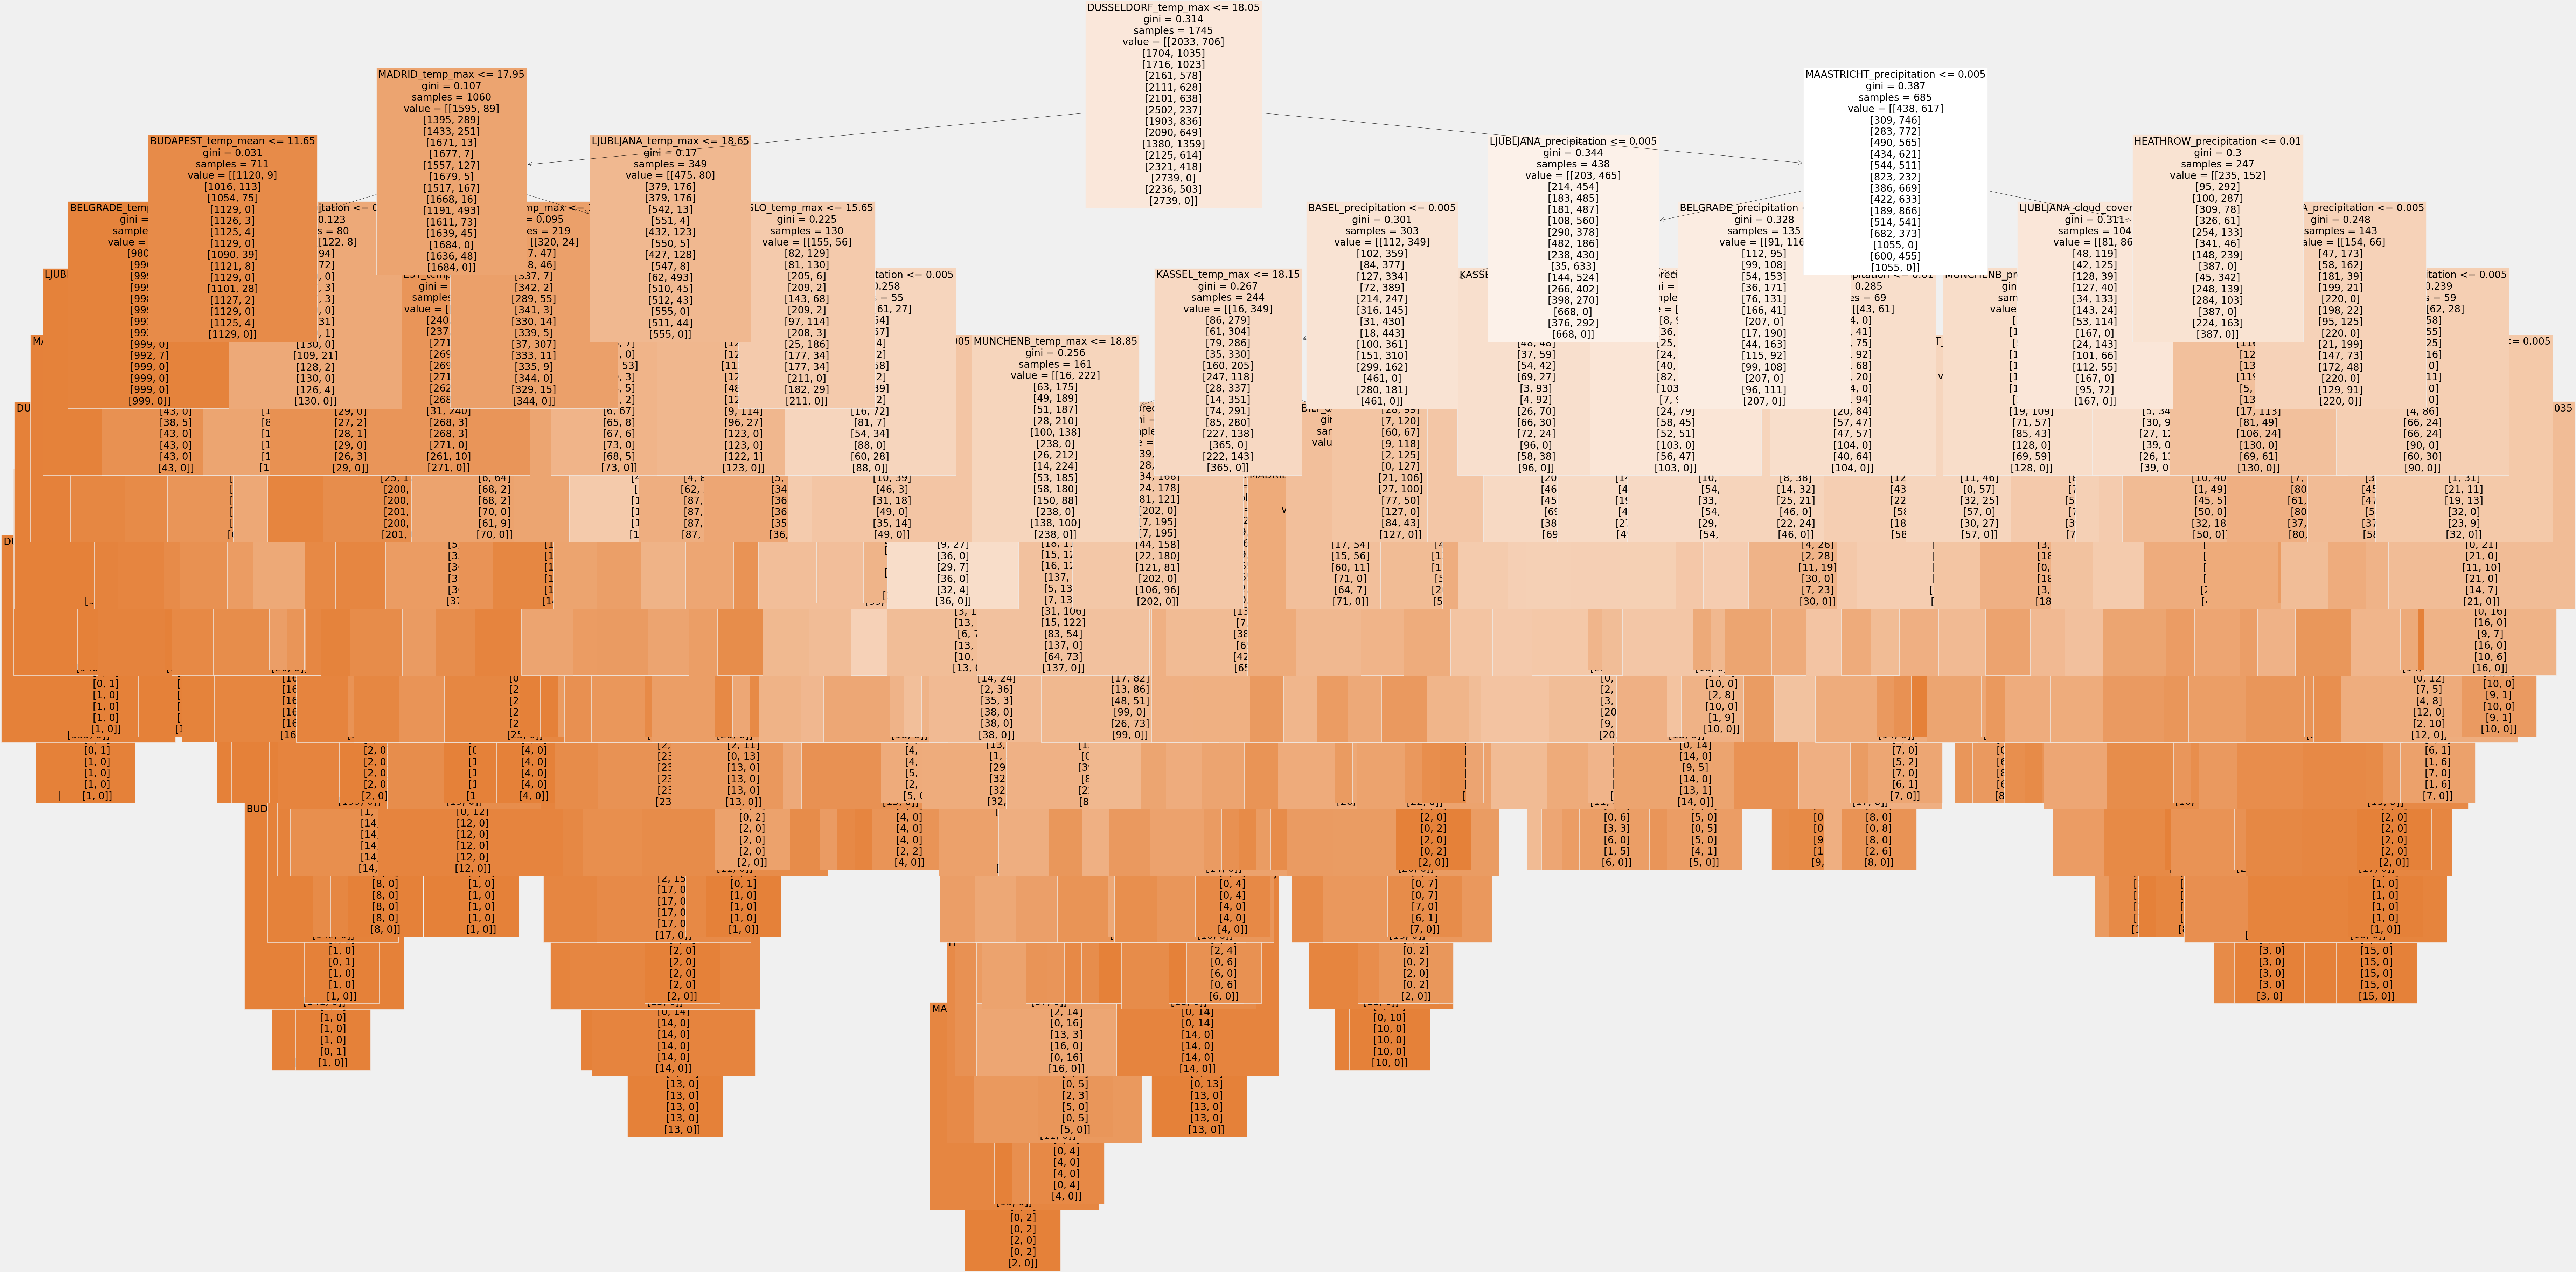

In [59]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf3.estimators_[15], fontsize = 20, feature_names = climate_decade.columns, class_names=['unpleasant', 'pleasant'], filled=True);

In [ ]:
fig.savefig(os.path.join(path, '02 Data', 'optimized_random_forest_2010s.png'),bbox_inches='tight')

## 7. Uncovering Feature Importances

In [37]:
# Retrieve feature importances from the trained model

newarray = clf3.feature_importances_
print(clf3.feature_importances_.shape)
newarray

(150,)


array([4.01236401e-03, 3.27084686e-03, 3.06253633e-03, 3.51077353e-03,
       1.64915229e-02, 1.01269523e-02, 1.77570021e-02, 1.15566752e-02,
       2.09487193e-02, 3.66712962e-03, 3.10893612e-03, 3.95217936e-03,
       2.73195805e-03, 1.39792338e-02, 2.89366455e-03, 5.11854812e-03,
       2.82400023e-03, 8.97163900e-03, 3.16259258e-04, 0.00000000e+00,
       0.00000000e+00, 1.39516293e-03, 1.27300900e-02, 1.35208760e-03,
       1.47137394e-02, 5.83431974e-03, 1.90342455e-02, 2.75233878e-03,
       3.01716853e-03, 4.00021946e-03, 3.35846127e-03, 1.58921554e-02,
       4.78798721e-03, 1.92807847e-02, 2.60514505e-03, 3.63471816e-02,
       2.76676881e-03, 4.02883813e-03, 4.69769505e-03, 3.91518303e-03,
       1.82444613e-02, 6.64512572e-03, 1.38972439e-02, 2.41543136e-03,
       3.32661383e-02, 1.87026324e-03, 1.72015811e-03, 9.78793688e-04,
       3.63004177e-03, 3.44638773e-03, 7.16545351e-03, 2.49887007e-03,
       3.98980417e-03, 3.35959947e-03, 4.16756880e-03, 1.09322593e-02,
      

In [38]:
# Reshape newarray

newarray = newarray.reshape(-1,15,10)
print(newarray.shape)
newarray

(1, 15, 10)


array([[[4.01236401e-03, 3.27084686e-03, 3.06253633e-03, 3.51077353e-03,
         1.64915229e-02, 1.01269523e-02, 1.77570021e-02, 1.15566752e-02,
         2.09487193e-02, 3.66712962e-03],
        [3.10893612e-03, 3.95217936e-03, 2.73195805e-03, 1.39792338e-02,
         2.89366455e-03, 5.11854812e-03, 2.82400023e-03, 8.97163900e-03,
         3.16259258e-04, 0.00000000e+00],
        [0.00000000e+00, 1.39516293e-03, 1.27300900e-02, 1.35208760e-03,
         1.47137394e-02, 5.83431974e-03, 1.90342455e-02, 2.75233878e-03,
         3.01716853e-03, 4.00021946e-03],
        [3.35846127e-03, 1.58921554e-02, 4.78798721e-03, 1.92807847e-02,
         2.60514505e-03, 3.63471816e-02, 2.76676881e-03, 4.02883813e-03,
         4.69769505e-03, 3.91518303e-03],
        [1.82444613e-02, 6.64512572e-03, 1.38972439e-02, 2.41543136e-03,
         3.32661383e-02, 1.87026324e-03, 1.72015811e-03, 9.78793688e-04,
         3.63004177e-03, 3.44638773e-03],
        [7.16545351e-03, 2.49887007e-03, 3.98980417e-03, 3.3

In [39]:
# Collapse this shape into one observation for each weather station

sumarray = np.sum(newarray[0], axis=1)
sumarray

array([0.09440452, 0.04389642, 0.06482937, 0.0976802 , 0.08611405,
       0.05720073, 0.03408049, 0.09322449, 0.11884566, 0.07592751,
       0.08863195, 0.02805532, 0.03698253, 0.05482835, 0.02529841])

In [40]:
# Extract stations list

stations = [col.split('_')[0] for col in climate_decade.columns if '_' in col]

In [42]:
# Create a set of unique station names

unique_stations = set(stations)
unique_stations

{'BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'GDANSK',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'ROMA',
 'SONNBLICK',
 'STOCKHOLM',
 'TOURS',
 'VALENTIA'}

In [47]:
# Convert the set of unique stations to a list

unique_stations_list = unique_stations_list[:len(sumarray)]

In [48]:
# Create a set of unique station names

unique_stations = set(stations)
unique_stations

{'BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'GDANSK',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'ROMA',
 'SONNBLICK',
 'STOCKHOLM',
 'TOURS',
 'VALENTIA'}

In [49]:
important = pd.Series(sumarray, index = unique_stations_list)
important = important.sort_values(ascending = False)
important

STOCKHOLM     0.118846
DEBILT        0.097680
DUSSELDORF    0.094405
BUDAPEST      0.093224
TOURS         0.088632
MUNCHENB      0.086114
MAASTRICHT    0.075928
BASEL         0.064829
HEATHROW      0.057201
KASSEL        0.054828
BELGRADE      0.043896
LJUBLJANA     0.036983
OSLO          0.034080
MADRID        0.028055
SONNBLICK     0.025298
dtype: float64

In [50]:
# Create a df to associate weather stations with their importances

df_importance = pd.DataFrame({
    'Weather Station': unique_stations_list,
    'Importance': sumarray
})

df_importance = df_importance.sort_values(by='Importance', ascending = False)

['DUSSELDORF', 'BELGRADE', 'BASEL', 'DEBILT', 'MUNCHENB', 'HEATHROW', 'OSLO', 'BUDAPEST', 'STOCKHOLM', 'MAASTRICHT', 'TOURS', 'MADRID', 'LJUBLJANA', 'KASSEL', 'SONNBLICK']


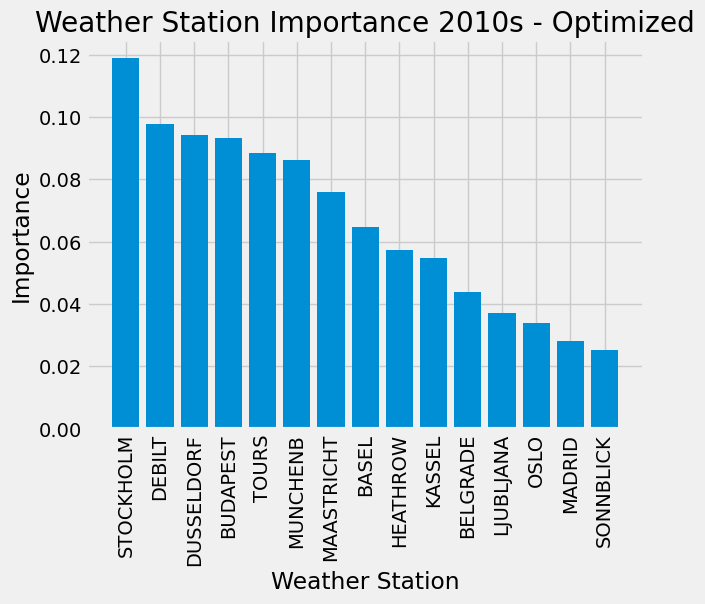

In [ ]:
# Plot the results

%matplotlib inline

plt.style.use('fivethirtyeight')
print(unique_stations_list)

plt.bar(df_importance['Weather Station'], df_importance['Importance'], orientation = 'vertical')
plt.xticks(rotation='vertical')
plt.xlabel('Weather Station')
plt.ylabel('Importance')
plt.title('Weather Station Importance 2010s - Optimized')

plt.savefig(os.path.join(path, '02 Data', 'optimized_2010s_feauture_importances.png'), bbox_inches='tight')

plt.show()